In [4]:
import random


def objective_function(x):
    # This is the function we want to optimize.
    # In this case, we are trying to minimize the sum of the squares of the elements of x.
    return sum(x_i**2 for x_i in x)


def stochastic_approximation(n, epsilon):
    # Initialize the solution with random values.
    x = [random.random() for _ in range(n)]
    print(x)

    # Set the step size.
    alpha = 0.1

    # Iterate until the solution is within the desired tolerance.
    while True:
        # Choose a random index.
        i = random.randint(0, n-1)

        # Compute the gradient at the current point.
        gradient = 2 * x[i]

        # Update the solution using the gradient descent rule.
        x[i] -= alpha * gradient

        # Check the convergence criterion.
        if abs(gradient) < epsilon:
            break

    # Return the optimal solution.
    return x


# Solve the optimization problem using stochastic approximation.
solution = stochastic_approximation(5, 1e-3)

# Print the optimal solution.
print(solution)


[0.4221651923635401, 0.8003970153501345, 0.4201395360042627, 0.15597305744586631, 0.4768479824583154]
[0.0006532689935243011, 0.000634139848080926, 0.0010158350658329267, 0.0003771197126210871, 0.0009223581408400021]


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import numpy as np

# Define the objective function.
def f(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Create a meshgrid of points.
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D plot of the objective function.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Set the initial point.
x0 = [-1.5, 1.5]

# Use the gradient descent method to optimize the objective function.
result = minimize(f, x0, method='CG')

# Print the optimal solution.
print(result.x)

# Use the Nelder-Mead method to optimize the objective function.
result = minimize(f, x0, method='Nelder-Mead')

# Print the optimal solution.
print(result.x)

# Use the Powell method to optimize the objective function.
result = minimize(f, x0, method='Powell')

# Print the optimal solution.
print(result.x)


TypeError: f() takes 1 positional argument but 2 were given

In [7]:
from scipy.optimize import minimize
from sklearn.utils.optimize import plot_convergence
import numpy as np

# Define the objective function.
def f(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Set the initial point.
x0 = [-1.5, 1.5]

# Use the gradient descent method to optimize the objective function.
result = minimize(f, x0, method='CG')

# Extract the optimization path.
x_path_cg = result.x_iters

# Use the Nelder-Mead method to optimize the objective function.
result = minimize(f, x0, method='Nelder-Mead')

# Extract the optimization path.
x_path_nm = result.x_iters

# Use the Powell method to optimize the objective function.
result = minimize(f, x0, method='Powell')

# Extract the optimization path.
x_path_powell = result.x_iters

# Create a figure.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot the optimization path for the gradient descent method.
for x in x_path_cg:
    ax1.plot(x[0], x[1], 'bo')
ax1.plot(x_path_cg[-1][0], x_path_cg[-1][1], 'ro')
ax1.set_title('Gradient descent')

# Plot the optimization path for the Nelder-Mead method.
for x in x_path_nm:
    ax2.plot(x[0], x[1], 'bo')
ax2.plot(x_path_nm[-1][0], x_path_nm[-1][1], 'ro')
ax2.set_title('Nelder-Mead')

# Plot the optimization path for the Powell method.
for x in x_path_powell:
    ax3.plot(x[0], x[1], 'bo')
ax3.plot(x_path_powell[-1][0], x_path_powell[-1][1], 'ro')
ax3.set_title('Powell')

# Show the figure.
plt.show()


AttributeError: x_iters

AttributeError: x_iters

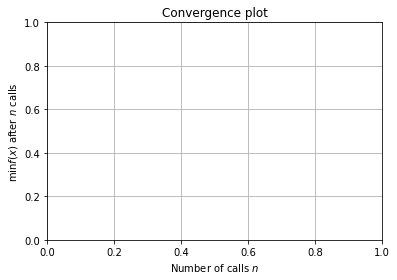

In [12]:
# from sklearn.utils.optimize import plot_convergence
from skopt.plots import plot_convergence
# Use the minimize function to optimize an objective function
result = minimize(objective_function, x0, method='BFGS')

# Extract the history of function values from the result object
# history = result.history

# Plot the convergence of the objective function
plot_convergence(result)

In [14]:
# https://scikit-optimize.github.io/stable/auto_examples/hyperparameter-optimization.html#sphx-glr-auto-examples-hyperparameter-optimization-py

/Users/yangch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

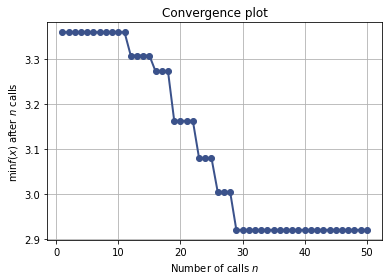

In [13]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

boston = load_boston()
X, y = boston.data, boston.target
n_features = X.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))
                                    
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)
from skopt.plots import plot_convergence

plot_convergence(res_gp)
